# Air Passenger dataset


- Check for missing values
- Fill the null values using forward fill and rolling mean
- Plot the series
- Check for stationarity in the data using KPSS test
- Convert the non-stationary data to stationary by the method of differencing
- Plot ACF and PCAF for the data
- Perform the ARIMA forecasting of the data
- Check for Accuracy of the data
- Conclude your results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Importing the data set

df = pd.read_csv('F:\Skillenable\Data frames\AirPassengers_.csv', parse_dates = ['Month'])

df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [2]:
# As my data is inform a data frame (rows and columns), i must convert this into a pandas series by: 
# STEP A: Set the interval column as index values

ts = df.set_index("Month")

ts.head()

# STEP B: To convert the data frame into series

final_ts = ts['#Passengers']

type(final_ts)

pandas.core.series.Series

In [3]:
# KPSS test
from statsmodels.tsa.stattools import kpss

In [4]:
stats, p, lags, critical_values = kpss(df['#Passengers'], 'ct')

In [5]:
stats, p, lags, critical_values

print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'critical values: {critical_values}')

Test Statistics: 0.16273657405822856
p-value: 0.0360528549514762
critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [6]:
if p< 0.05:
    print(" The series is non-stationary")
else:
        print(" The series is stationary")

 The series is non-stationary


In [7]:
# convert the time series into stationary
# peform the log tranformation

log_ts = np.log(final_ts)
log_ts.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

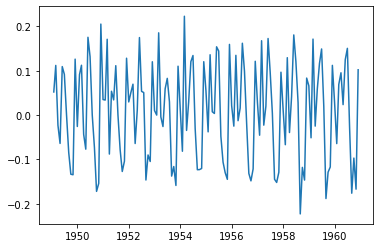

In [8]:
#differencing the time series - This can be done using shift()

diff1_ts = log_ts - log_ts.shift()

# Lets plot the diff1_ts
plt.plot(diff1_ts)


In [9]:
#level 2 differencing
diff2_ts = diff1_ts - diff1_ts.shift()

# Remove the missing values
diff2_ts.dropna(inplace = True)

# Lets perform the dikey-fuller test
result2 = adfuller(diff2_ts)
result2

(-8.196629132182297,
 7.419304549373687e-13,
 13,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -430.89362828642743)

In [10]:
# By-passing ACF

# build ARIMA model- AR model with p = 1, d = 2, q = 0

from statsmodels.tsa.arima_model import ARIMA




In [11]:
# Model

model_AR = ARIMA(log_ts, order = (1,2,0))

#fit this model to get the summary of the model

summary_model = model_AR.fit(disp = False)

summary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                  142
Model:                 ARIMA(1, 2, 0)   Log Likelihood                  89.869
Method:                       css-mle   S.D. of innovations              0.128
Date:                Fri, 25 Feb 2022   AIC                           -173.738
Time:                        11:57:52   BIC                           -164.870
Sample:                    03-01-1949   HQIC                          -170.135
                         - 12-01-1960                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0002      0.008     -0.022      0.982      -0.016       0.016
ar.L1.D2.#Passengers    -0.2994      0.081     -3.697      0.000      -0.458      -0.141
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3397           +0.0000j            3.3397            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
# build the 2nd model - - MA model with p = 0, d = 2, q = 1

model_MA = ARIMA(log_ts, order = (0,2,1))

# Lets fit this model to get the summary of the model

summary_model_MA = model_MA.fit(disp = False)
summary_model_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                  142
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 114.058
Method:                       css-mle   S.D. of innovations              0.107
Date:                Fri, 25 Feb 2022   AIC                           -222.117
Time:                        11:57:52   BIC                           -213.249
Sample:                    03-01-1949   HQIC                          -218.513
                         - 12-01-1960                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.792e-05      0.000     -0.407      0.684      -0.001       0.000
ma.L1.D2.#Passengers    -0.9985      0.018    -55.945      0.000      -1.033      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
# The AIC value of AR model -173.738 and AIC value for MA model -222.117,
# The MA model has least AIC value thus MA model will be the best model to forcast the time series data.

In [14]:
# PCAF on iris data
from pydataset import data


In [15]:
df1 = data("iris")

df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [16]:
# define X and Y

X = df1[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
Y = df1[['Species']]

In [17]:
# Split the data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1234)

In [18]:
# Build the model on X_train and Y_train

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 1234)

In [53]:
# fit the model
model1 = RF.fit(X_train, Y_train)

model1

RandomForestClassifier(random_state=1234)

In [54]:
RandomForestClassifier(random_state=1234)

RandomForestClassifier(random_state=1234)

In [55]:
# Predict the test cases

Y_test['Pred_Species'] = model1.predict(X_test)

Y_test.head()

,Species,Pred_Species
92,versicolor,versicolor
64,versicolor,versicolor
104,virginica,virginica
7,setosa,setosa
60,versicolor,versicolor


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
# cofusion matrix and accuracy
print(confusion_matrix(Y_test['Species'], Y_test['Pred_Species']))
print(accuracy_score(Y_test['Species'], Y_test['Pred_Species']))

[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]
1.0


In [57]:
sc = StandardScaler()

In [58]:
# fit on input variable
X_scaled = sc.fit_transform(X)

In [45]:
# find all the principle components

pca = PCA(n_components=4) 
pca

PCA(n_components=4)

In [46]:
# fit PCA objet on scaled inpit variable
pca.fit(X_scaled)

PCA(n_components=4)

In [47]:
# How much info. each of these PCs will be giving for the original data-

var = pca.explained_variance_ratio_
var

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [48]:
# by using first 2 input we can get 95+% information to extract output with good accuracy


In [59]:
# below steps to build model using PCs

In [60]:
# find your two PCs
pca_new = PCA(n_components=2)

In [62]:
# scale x_tain and x_test
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)

In [63]:
# Applying the PCs on X_train_scaled, x_test_sccaled
x_train_pc = pca_new.fit_transform(x_train_scaled)
x_test_pc = pca_new.transform(x_test_scaled)

In [65]:
# Build the model
RF = RandomForestClassifier(random_state=1234)
model2 = RF.fit(x_train_pc, Y_train)

In [67]:
#  predict test cases
Y_test['Pred_Species_PCA'] = model2.predict(x_test_pc)

In [69]:
# confusion matrics and accuracy
print(confusion_matrix(Y_test['Species'], Y_test['Pred_Species_PCA']))
print(accuracy_score(Y_test['Species'], Y_test['Pred_Species_PCA']))

[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]
0.9666666666666667
